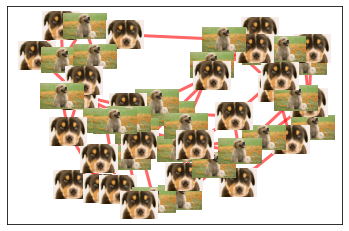

In [109]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
from numpy import sqrt
import glob
#######################
path = 'dog/'
files = [f for f in glob.glob(path + "*.png")]
img = []
for f in files:
    img.append(mpimg.imread(f))
# N = len(files)
######################
img = img*50
# generate graph
N = 50
G = nx.watts_strogatz_graph(N,4,0.2)
pos=nx.spring_layout(G,k=3/sqrt(N))

# draw with images on nodes
nx.draw_networkx(G,pos,width=3,edge_color="r",alpha=0.6)
ax=plt.gca()
fig=plt.gcf()
trans = ax.transData.transform
trans2 = fig.transFigure.inverted().transform
imsize = 0.1 # this is the image size

for n in G.nodes():
    (x,y) = pos[n]
    xx,yy = trans((x,y)) # figure coordinates
    xa,ya = trans2((xx,yy)) # axes coordinates
    a = plt.axes([xa-imsize/2.0,ya-imsize/2.0, imsize, imsize ])
    ############
    a.imshow(img[n])
    ##############
    a.set_aspect('equal')
    a.axis('off')
plt.savefig('./save.png') 